In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline

In [2]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df['Age'].mean()

45.3384

In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Exploratory Analysis

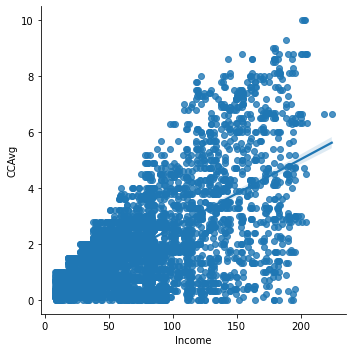

In [7]:
sns.lmplot(x='Income',y='CCAvg',data=df)

the scatter plot above shows that the more your income,the more your Avg. spending on credit cards per month. thus there exist a postive relationship between Customer Income and their spending on credit cards. 

<AxesSubplot:xlabel='Age', ylabel='count'>

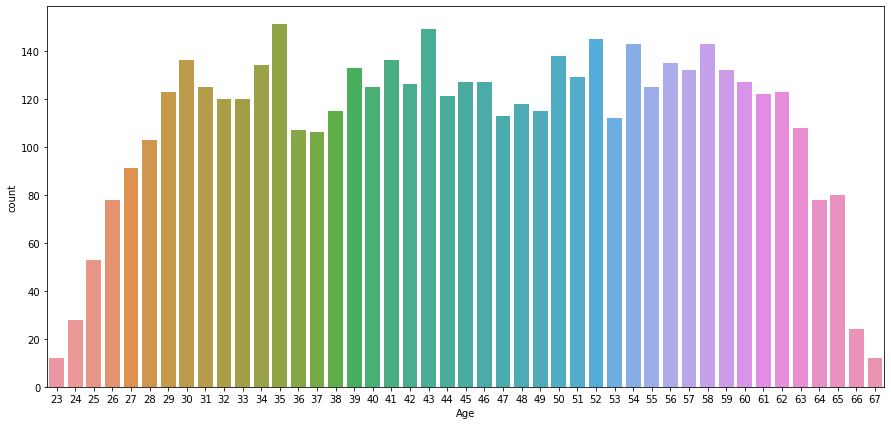

In [8]:
fig=plt.figure(figsize=(15,7))
sns.countplot(x='Age',data=df)

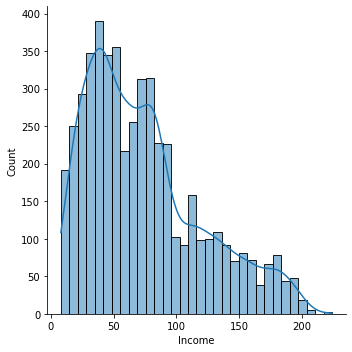

In [9]:
# fig=plt.figure(figsize=(50,40))
sns.displot(data=df,x='Income' , kde=True)

In [10]:
# To check whether or not there is any missing values using seaborn

<AxesSubplot:>

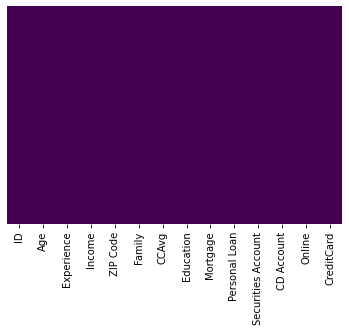

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
x= dict(Counter(df['Education']))
x

{1: 2096, 2: 1403, 3: 1501}

([<matplotlib.patches.Wedge at 0x19cb063ac70>,
 [Text(0.27623574505606585, 1.064750587298885, '1'),
  Text(-1.0240212101623698, -0.40172199483921184, '2'),
  Text(0.646004538071224, -0.8903247367064361, '3')],
 [Text(0.15067404275785407, 0.5807730476175735, '41.92%'),
  Text(-0.558557023724929, -0.2191210880941155, '28.06%'),
  Text(0.3523661116752131, -0.48563167456714684, '30.02%')])

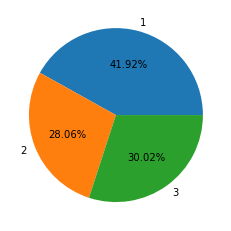

In [13]:
plt.pie(x.values(),labels=x.keys(),autopct='%1.2f%%')

The above shows that most of the banks customers are Undergraduates recording to about 41.92% followed by the advanced/ Professional amount to about 30.02% and the graduates, the least

<AxesSubplot:xlabel='Education', ylabel='Income'>

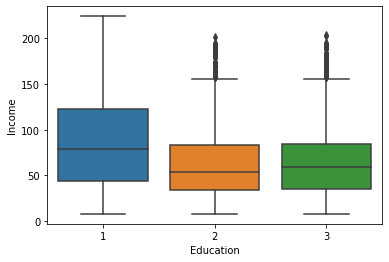

In [14]:
sns.boxplot(x="Education",y="Income",data=df)

<AxesSubplot:>

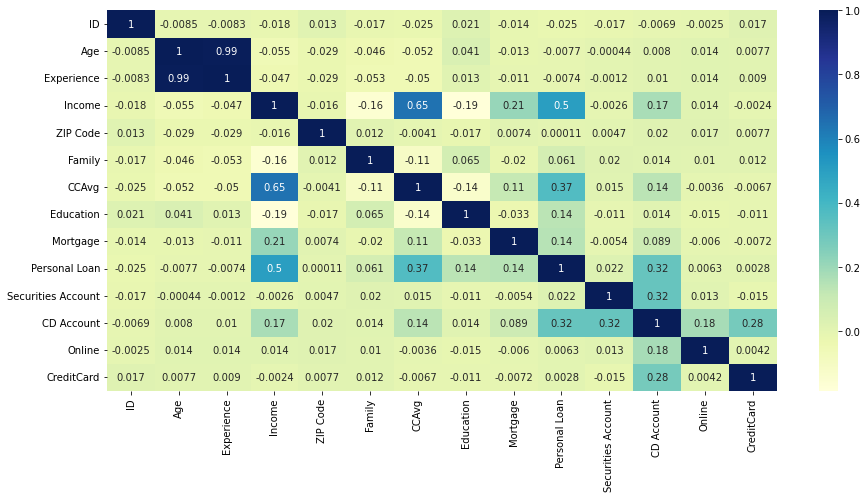

In [15]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

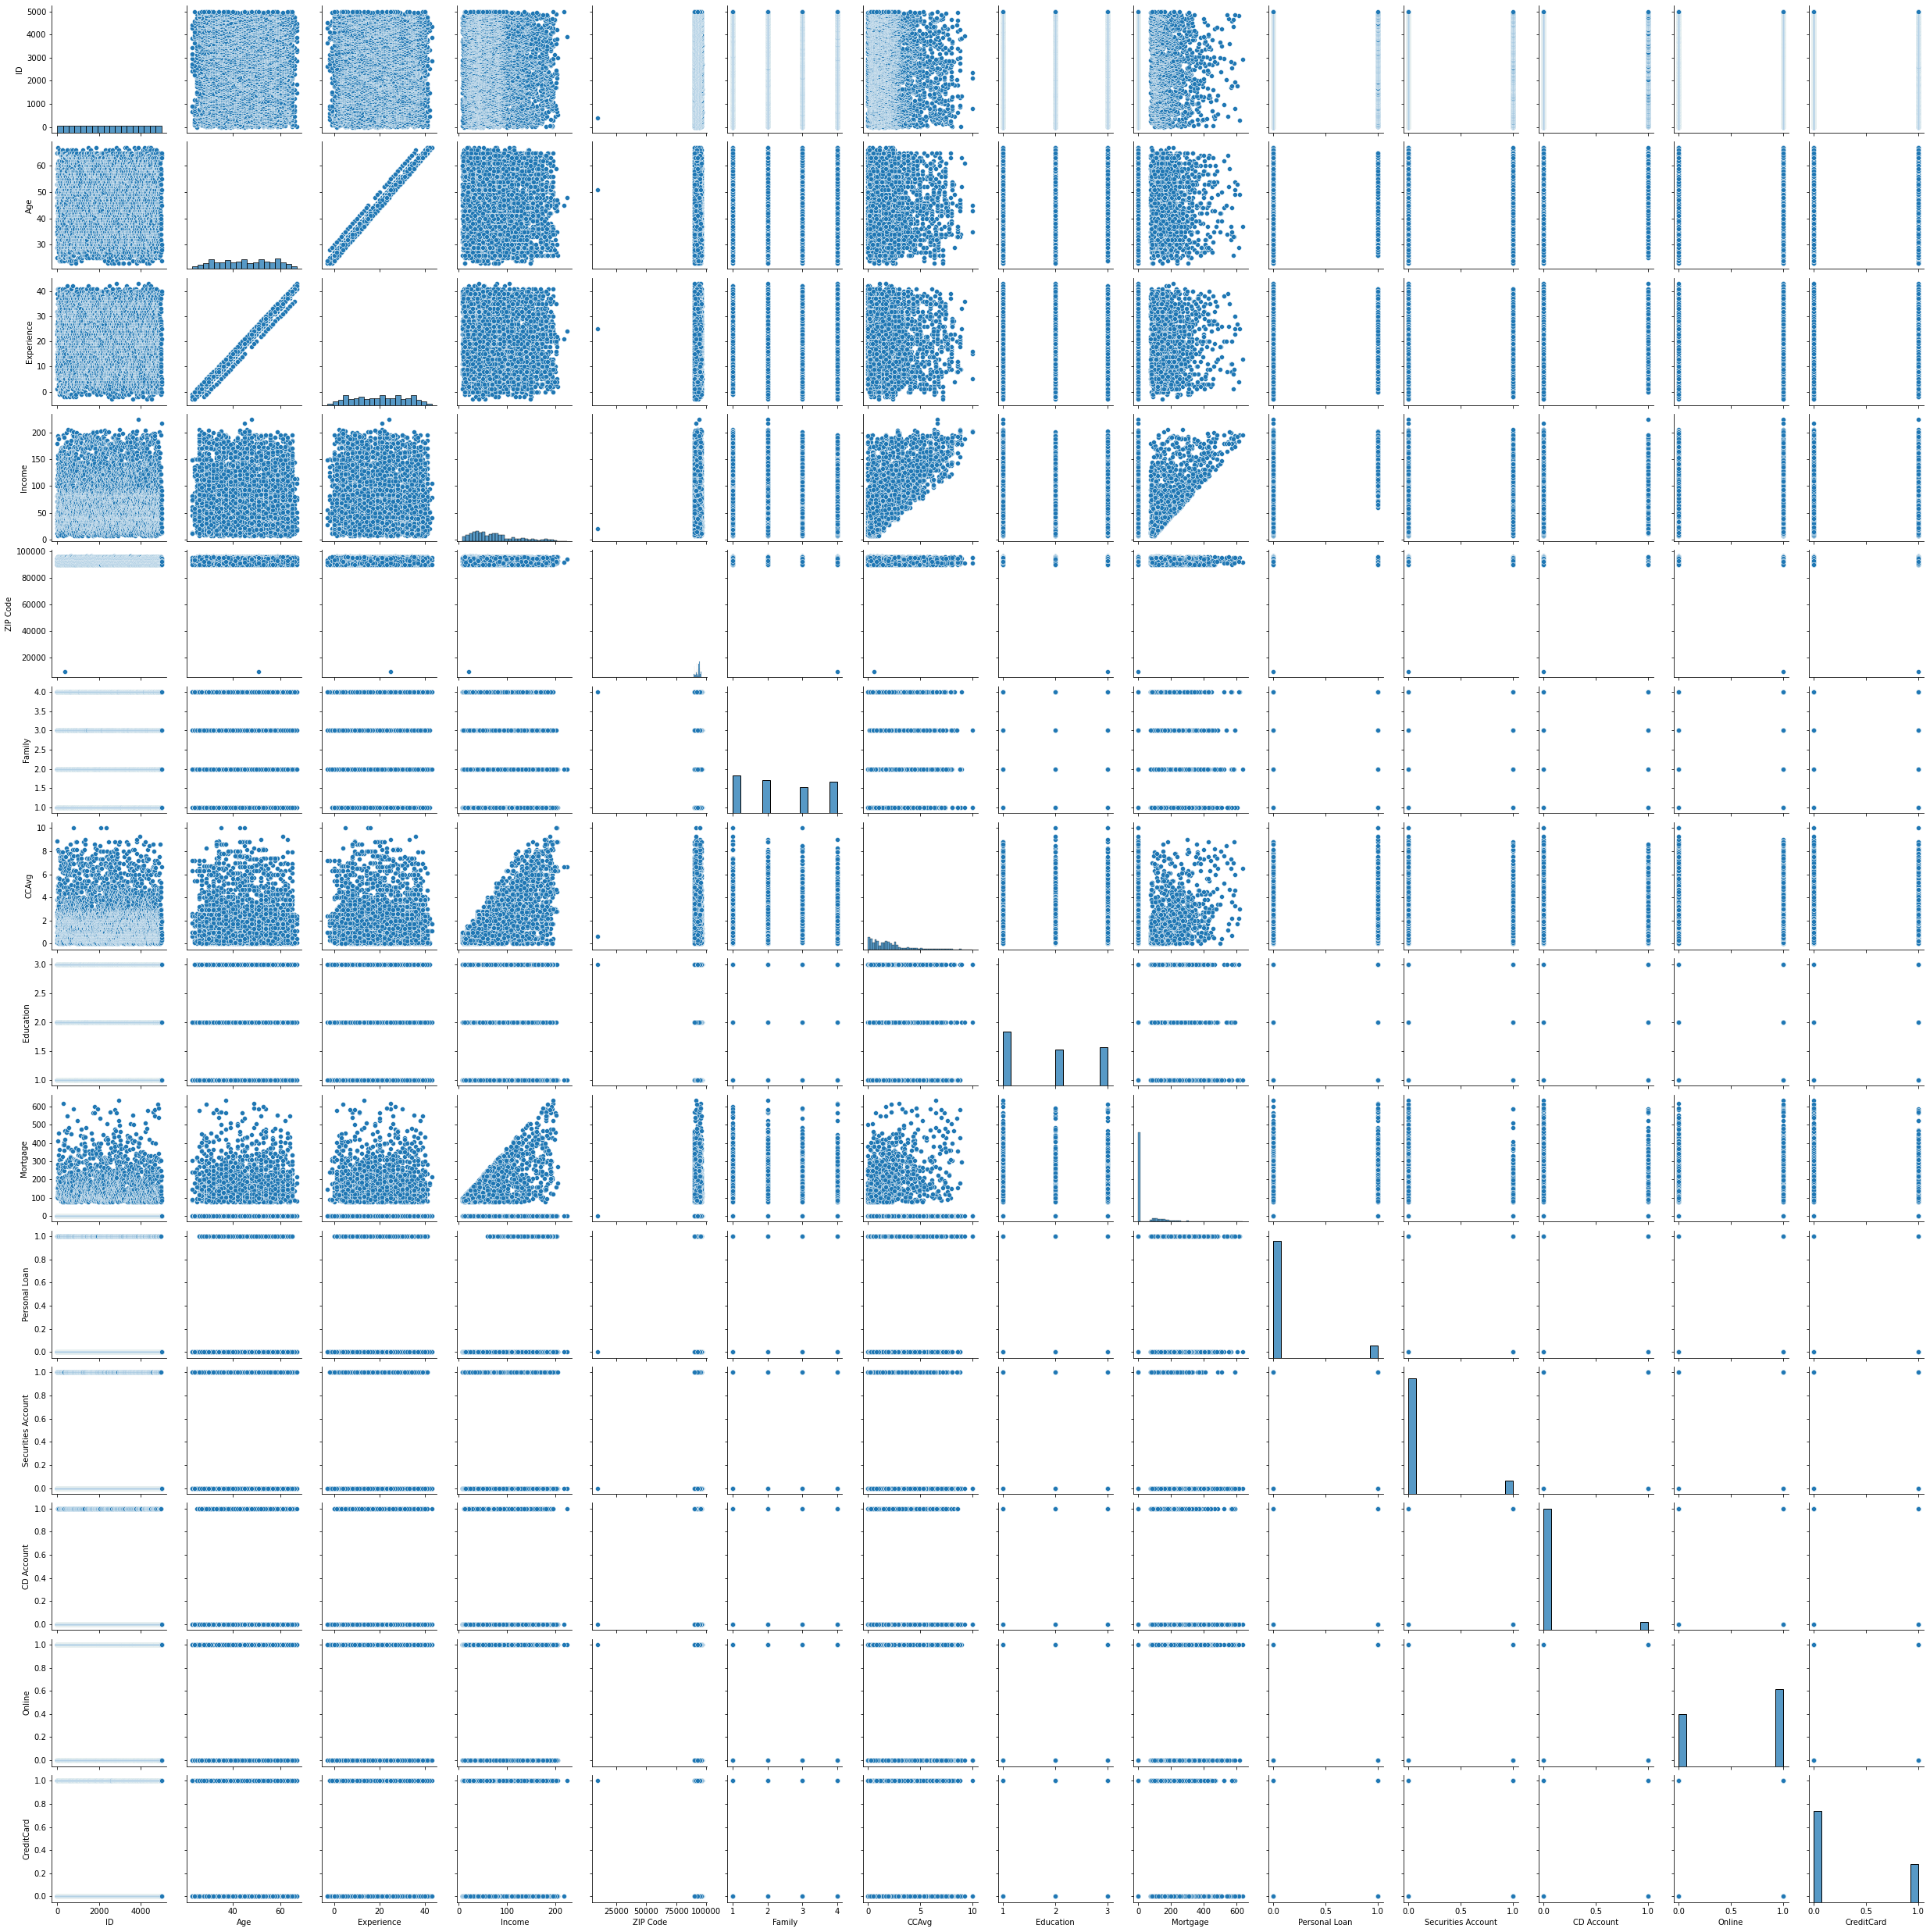

In [49]:
sns.pairplot(df)

In [16]:
init_notebook_mode(connected=True)

In [17]:
cf.go_offline()

In [18]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
